In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [7]:
import pandas as pd

In [8]:
import os

In [58]:
dados = pd.read_csv("../2-AggregateData/googleMaintainers_exclude_internal_pulls_last3.csv") #../2-AggregateData/googleMaintainers_exclude_internal_pulls.csv

In [59]:
dados
#print(dados)

,Unnamed: 0,framework,login,seguidores,numero_prs_criados,numero_merges,numero_prs_criado_mergeado,numero_prs_criado_n_mergeado,numero_prs_n_mergeado_fechado,numero_prs_fechado,numero_merges_exclude_auto_merge,numero_revisoes_exclude_auto_revisado,auto_revisado,tempo experiencia(dias)
0,0,Android,caller9,3.0,0,6,0,0,0,6,6,6,0,143
1,1,Android,jscott1989,24.0,0,1,0,0,1,2,1,2,0,2
2,2,Android,tnorbye,831.0,0,5,0,0,0,5,5,5,0,606
3,3,Android,samtstern,1855.0,0,4,0,0,1,5,4,5,0,292
4,4,Android,chkuang-g,11.0,0,6,0,0,1,7,6,7,0,372
5,5,Android,vimanyu,4.0,0,0,0,0,1,1,0,1,0,372
6,6,Android,stewartmiles,58.0,0,2,0,0,1,3,2,3,0,54
7,7,Android,gguuss,NaN,0,0,0,0,0,0,0,0,0,54
8,8,Android,ggfan,NaN,0,0,0,0,0,0,0,0,0,54
9,9,Android,WilliamDenniss,113.0,0,1,0,0,0,1,1,1,0,0


Fazer para numero de merged pf e depois fazer para os create

In [62]:
contagem = []
for numero in dados['numero_revisoes_exclude_auto_revisado']:
  contagem.append(numero)


In [63]:
contagem

[6, 2, 5, 5, 7, 1, 3, 0, 0, 1, 4, 3, 0, 1, 9, 0, 2, 0, 4, 14, 3, 9, 1, 1]

In [64]:
contagem.sort()

Aqui eu crio as porcentagens que vamos usar, coloquei de 5% em 5%

In [65]:
percentiles=[x * 0.05 for x in range(1, 21)]

In [66]:
percentiles

[0.05,
 0.1,
 0.15000000000000002,
 0.2,
 0.25,
 0.30000000000000004,
 0.35000000000000003,
 0.4,
 0.45,
 0.5,
 0.55,
 0.6000000000000001,
 0.65,
 0.7000000000000001,
 0.75,
 0.8,
 0.8500000000000001,
 0.9,
 0.9500000000000001,
 1.0]

In [67]:
result = pd.DataFrame(contagem).describe(percentiles=percentiles).values[4:24]

In [68]:
pd.DataFrame(contagem).describe(percentiles=percentiles)

,0
count,24.000000
mean,3.375000
std,3.560807
min,0.000000
5%,0.000000
10%,0.000000
15%,0.000000
20%,0.600000
25%,1.000000
30%,1.000000


In [69]:
len(contagem)

24

In [70]:
result

array([[ 0.  ],
       [ 0.  ],
       [ 0.  ],
       [ 0.6 ],
       [ 1.  ],
       [ 1.  ],
       [ 1.  ],
       [ 1.2 ],
       [ 2.  ],
       [ 2.5 ],
       [ 3.  ],
       [ 3.  ],
       [ 3.95],
       [ 4.1 ],
       [ 5.  ],
       [ 5.4 ],
       [ 6.55],
       [ 8.4 ],
       [ 9.  ],
       [14.  ]])

In [71]:
def gini(arr):
    ## first sort
    sorted_arr = arr.copy()
    sorted_arr.sort()
    n = arr.size
    coef_ = 2. / n
    const_ = (n + 1.) / n
    weighted_sum = sum([(i+1)*yi for i, yi in enumerate(sorted_arr)])
    return coef_*weighted_sum/(sorted_arr.sum()) - const_

In [72]:
def lorenz_curve(X, framework):
    X_lorenz = X.cumsum() / X.sum()
    X_lorenz = np.insert(X_lorenz, 0, 0)
    fig, ax = plt.subplots(figsize=[3,3])
    ## scatter plot of Lorenz curve
    ax.scatter(np.arange(X_lorenz.size)/(X_lorenz.size-1), X_lorenz,
               marker='.', color='darkgreen', s=100,label="Lorenz " + framework)
    ax.plot(np.arange(X_lorenz.size)/(X_lorenz.size-1), X_lorenz,color='darkgreen')
    ## line plot of equality
    ax.plot([0,1], [0,1], color='k',label="Perfect Equality")
    #plt.plot(y,label="lorenz")
#plt.plot(y_pe,label="perfect_equality")
    ax.legend()
    figure_title = "Lorenz Curve Pulls \nRequests "+ framework
    plt.text(0.5, 1.08, figure_title,
    horizontalalignment='center',
    fontsize=13,
    fontweight="bold",
    transform = ax.transAxes)
    ax.set_ylabel('Proportion of reviews',fontsize=13)
    ax.set_xlabel('Proportion of Maintainers',fontsize=13)
    ax.figure.savefig('../4-LorenzGini/' + framework + '_LORENZ_GINI_SAMPLE_Actual_last3.png', format='png',dpi = 250, bbox_inches='tight')

Colocar legenda na figura

In [73]:
gini(result)

array([0.52001395])

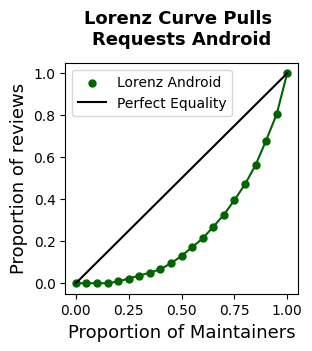

In [74]:
lorenz_curve(result,"Android")

In [ ]:
len(contagem[28:])
(24*100)/52

46.15384615384615